In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
path='/mnt/is2/fstasys/ITV/base09/out/'
s0=pynbody.load(path+'snapshot_008')

In [3]:
mdm=s0['mass']

In [4]:
t=np.loadtxt('/mnt/is2/fstasys/ITV/base09/rockstar/out_0.list',skiprows=16)

In [5]:
cut, = np.where (t[:,7]>=10)

In [6]:
halos=len(t[cut,7])
print('cantidad de halos de interes:',halos)

cantidad de halos de interes: 850350


In [7]:
dh=halos/(500**3)

In [8]:
ddm=(3*(100**2)*(0.276))/(8*np.pi*(4.3e-9))
mp=ddm*(500**3)/(512**3)/1e10
print('masa de particula:',mp)
print('menor masa de halo:',mp*20)

masa de particula: 7.135462886550386
menor masa de halo: 142.70925773100774


In [9]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996

In [10]:
mp*20*(1-masa_gs/masa_dm)/masa_dm

1231.7628477656924

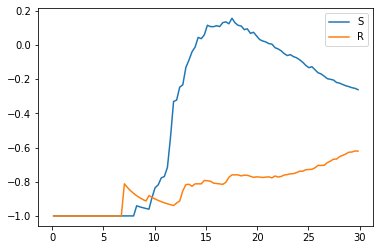

In [11]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R.dat')
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='S')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='R')
plt.legend()
#plt.xlim(9,14)
#plt.ylim(-1,-0.6)

PERFIL DE VELOCIDADES:

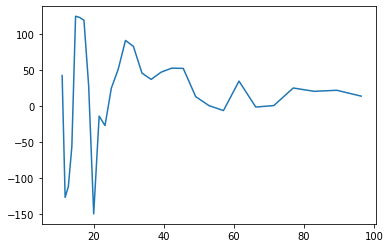

In [6]:
t=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/perfiles/halosprofileBASE.dat')
plt.plot(t[:,0],t[:,5])
#plt.xlim(0,40)

In [18]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S760.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S615.dat')

t3=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R760.dat')
t4=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R615.dat')

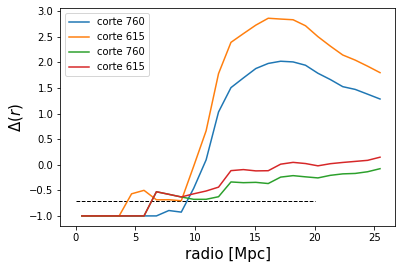

In [19]:
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='corte 760')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='corte 615')
plt.plot(t3[:,0],(t3[:,1]/t3[:,2]-dh)/dh,label='corte 760')
plt.plot(t4[:,0],(t4[:,1]/t4[:,2]-dh)/dh,label='corte 615')

plt.hlines(y=-0.7, xmin=0,xmax=20,ls='--',lw=1)
plt.xlabel('radio [Mpc]',size=15)
plt.ylabel('$ \Delta(r) $',size=15)
plt.legend()
#plt.ylim(-1,-0.5)
#plt.xlim(9.5,13)

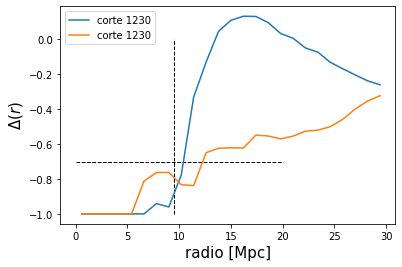

In [38]:
t1=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_S1230.dat')
t2=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/CosmoBox/halosprofile_R1230.dat')
plt.plot(t1[:,0],(t1[:,1]/t1[:,2]-dh)/dh,label='corte 1230')
plt.plot(t2[:,0],(t2[:,1]/t2[:,2]-dh)/dh,label='corte 1230')


plt.hlines(y=-0.7, xmin=0,xmax=20,ls='--',lw=1)
plt.vlines(x=9.5, ymin=-1,ymax=0,ls='--',lw=1)

plt.xlabel('radio [Mpc]',size=15)
plt.ylabel('$ \Delta(r) $',size=15)
plt.legend()
#plt.ylim(-1,-0.5)
#plt.xlim(9.5,11)